# EDA - Spotify Data Set

This dataset consists of popular songs of each year from 2010 to 2019. We will perform EDA on this data set and find out how several factors affect the song like bpm, loudness, valence, Energy etc.

### Attributes 
- Title : Name of the track
- Artist : Person who produced that track
- Genre : a particular type or style of music
- Year : Year release
- BPM : Beats per minute
- Energy : Denotes how energetic the song is
- Loudness : Denotes the loudness (dB) of a song
- Valence : the value denotes the valence, or how positive the mood of the song is
- Liveness : Likelihood of the song being a live recording
- Acousticness : How acoustic the song is
- Speechiness : How much spoken words are their in the song
- Popularity : Denotes how popular a song is

In [36]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# loading the data
df = pd.read_excel('spotify1.xlsx')
df.head()

,title,artist,genre,year,bpm,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97.0,89,67.0,-4,8,80.0,217.0,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87.0,93,75.0,-5,52,64.0,263.0,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120.0,84,76.0,-3,29,71.0,200.0,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119.0,92,70.0,-4,8,71.0,295.0,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109.0,84,64.0,-5,9,43.0,221.0,2,4,78


In [38]:
# number of rows and columns in the dataframe
df.shape

(606, 14)

In [39]:
# number of non null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          606 non-null    object 
 1   artist         606 non-null    object 
 2   genre          605 non-null    object 
 3   year           606 non-null    int64  
 4   bpm            605 non-null    float64
 5   Energy         606 non-null    int64  
 6   Danceability   605 non-null    float64
 7   Loudness       606 non-null    int64  
 8   Liveness       606 non-null    int64  
 9   Valence        603 non-null    float64
 10  Length         605 non-null    float64
 11  Acousticness   606 non-null    int64  
 12  Speechiness    606 non-null    int64  
 13  Popularity     606 non-null    int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 66.4+ KB


## Data Cleaning
### Dealing with duplicate rows

In [40]:
# Find missing values
df.isna().sum()

title            0
artist           0
genre            1
year             0
bpm              1
Energy           0
Danceability     1
Loudness         0
Liveness         0
Valence          3
Length           1
Acousticness     0
Speechiness      0
Popularity       0
dtype: int64

There are 3 missing values in Valence column, 1 genre column, 1 danceability column, 1 length column and 1 bpm.

In [41]:
# Number of duplicate rows
df.duplicated().sum()

3

In [42]:
# Droping duplicate rows 
df.drop_duplicates(inplace=True)

### Dealing with missing values

In [43]:
# replacing empty space with nan value. 
df['Valence '].replace('', int(df['bpm'].mode()),inplace=True) # Replacing values with mode.
df['Length'].replace('', df['bpm'].median(), inplace=True) # Replacing values with median.
df['bpm'].replace('', df['bpm'].mean(), inplace=True) #Replacing values with mean.
df['genre'].replace('', np.nan, inplace=True)

In [44]:
# Dropping nan values. 
df.dropna(inplace=True)

In [45]:
# statistical values of dataframe
df.describe()

,year,bpm,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000
mean,2014.577889,118.579564,70.499162,64.499162,-5.582915,17.765494,52.355109,224.504188,14.231156,8.338358,66.504188
std,2.615656,24.810472,16.250206,13.365490,2.809722,13.137577,22.530543,34.099126,20.616346,7.436719,14.566973
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,220.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,74.000000,-4.000000,24.000000,69.000000,239.000000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [46]:
# number of unique values in each column
df.nunique()

title            579
artist           183
genre             50
year              10
bpm              104
Energy            77
Danceability      70
Loudness          14
Liveness          61
Valence           94
Length           143
Acousticness      75
Speechiness       39
Popularity        71
dtype: int64

In [47]:
# Most popular genre
df['genre'].value_counts()

dance pop                    325
pop                           59
canadian pop                  33
barbadian pop                 15
boy band                      15
electropop                    13
big room                      10
neo mellow                     9
canadian contemporary r&b      9
british soul                   9
art pop                        8
complextro                     6
hip pop                        6
australian dance               6
atl hip hop                    5
australian pop                 5
edm                            5
permanent wave                 4
latin                          4
hip hop                        4
colombian pop                  3
tropical house                 3
brostep                        2
downtempo                      2
electronic trap                2
belgian edm                    2
escape room                    2
folk-pop                       2
electro                        2
indie pop                      2
detroit hi

<AxesSubplot:>

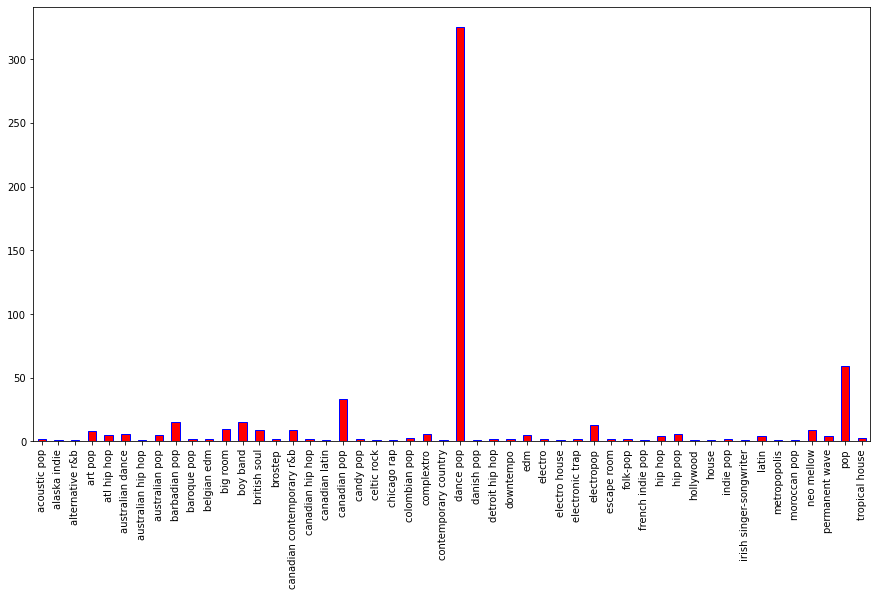

In [48]:
# bar plot to visualize popularity of genre
df['genre'].value_counts().sort_index().plot.bar(color='red', edgecolor='blue', figsize=(15,8))

<AxesSubplot:ylabel='genre'>

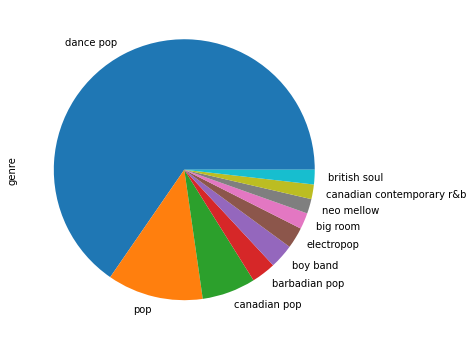

In [88]:
# pie chart to visualize share of top 10 genre
df['genre'].value_counts().head(10).plot.pie(figsize=(6,6))

In [50]:
# How many hit songs from perticular year
df['year'].value_counts()

2015    94
2016    76
2013    71
2017    64
2018    64
2014    58
2011    53
2010    51
2012    35
2019    31
Name: year, dtype: int64

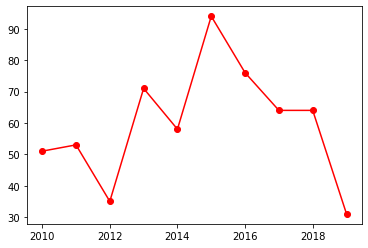

In [51]:
# line chart to represent rise and dip in popular songs per year
df['year'].value_counts().sort_index().plot(color='red', marker='o')
plt.show()

In [52]:
# Top 20 artists in the time period of 2010-2019
df['artist'].value_counts().head(20)

Katy Perry           17
Justin Bieber        16
Rihanna              15
Maroon 5             15
Lady Gaga            14
Bruno Mars           13
The Chainsmokers     11
Ed Sheeran           11
Pitbull              11
Calvin Harris        10
Jennifer Lopez       10
Shawn Mendes         10
David Guetta          9
Britney Spears        9
Ariana Grande         9
Kesha                 9
Justin Timberlake     9
Demi Lovato           8
Selena Gomez          8
Adele                 8
Name: artist, dtype: int64

<AxesSubplot:>

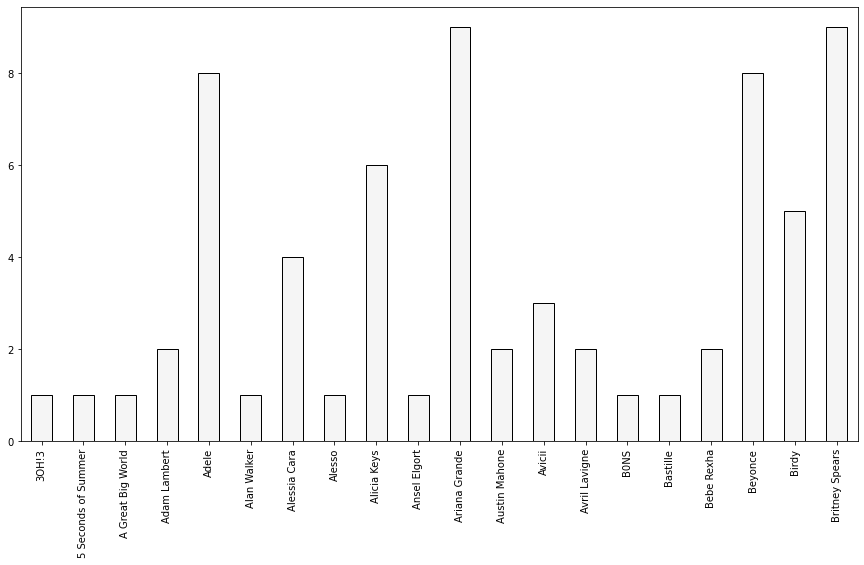

In [53]:
# Top 20 artists from 2010-2019
df['artist'].value_counts().sort_index().head(20).plot.bar(color='whitesmoke', edgecolor='black', figsize=(15,8))

#### Length of track

<AxesSubplot:>

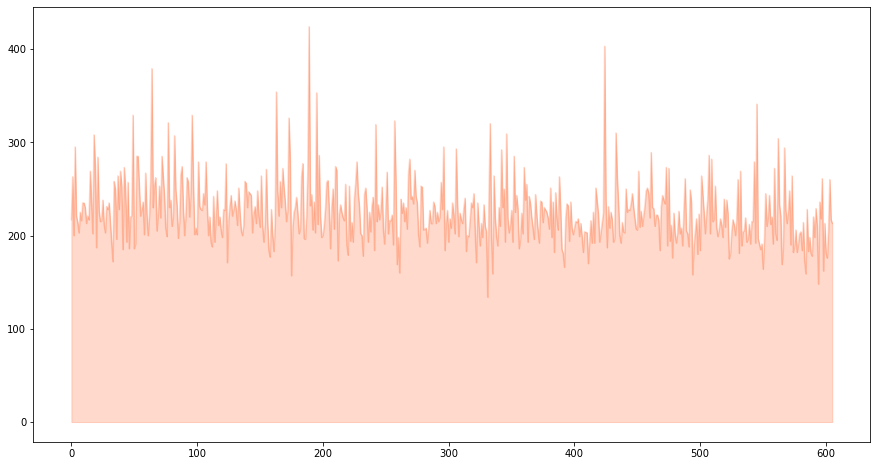

In [84]:
# Area chart to represent track length over the year
df['Length'].plot.area(figsize=(15,8), color='orangered',alpha=0.2)

C:\Users\Akhil Chandra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


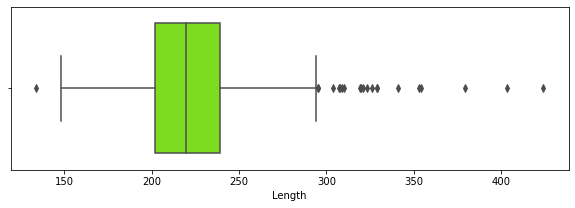

In [78]:
# Outliers in the length of songs
fig = plt.figure(figsize =(10, 3))
sns.boxplot(df['Length'], color='lawngreen')
plt.show()

In [55]:
# mean length of tracks in seconds
mean = df['Length'].mean()
print('Mean length of tracks in seconds :',mean)

Mean length of tracks in seconds : 224.50418760469012


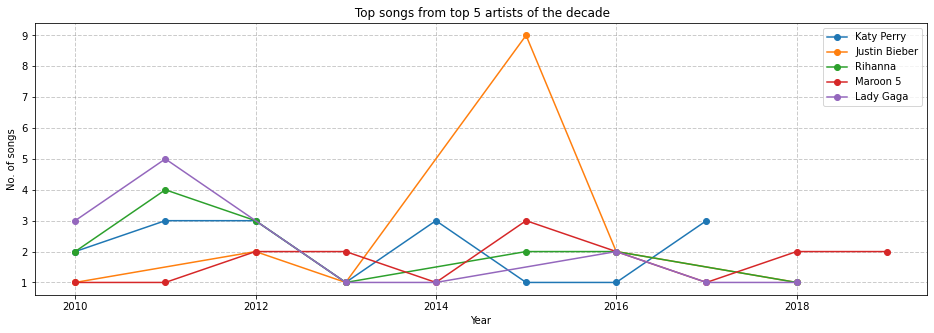

In [86]:
# number hits from top 5 artists over the years
df[df['artist']=='Katy Perry']['year'].value_counts().sort_index().plot(figsize=(16,5),marker='o')
df[df['artist']=='Justin Bieber']['year'].value_counts().sort_index().plot(marker='o')
df[df['artist']=='Rihanna']['year'].value_counts().sort_index().plot(marker='o')
df[df['artist']=='Maroon 5']['year'].value_counts().sort_index().plot(marker='o')
df[df['artist']=='Lady Gaga']['year'].value_counts().sort_index().plot(marker='o')
plt.grid(color = 'grey', alpha=0.4, linestyle='--', linewidth=1)
plt.legend(["Katy Perry", "Justin Bieber","Rihanna","Maroon 5","Lady Gaga"])
plt.title(" Top songs from top 5 artists of the decade")
plt.xlabel("Year")
plt.ylabel("No. of songs")
plt.show()

Justine Bieber gave most hit songs in year 2015 with 9 songs out of top 5 artists.

In [57]:
# maximum popularity of song
df['Popularity'].max()

99

In [58]:
# most popular song of the decade
df[df['Popularity']== df['Popularity'].max()]

,title,artist,genre,year,bpm,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
575,Memories,Maroon 5,pop,2019,91.0,32,76.0,-7,8,57.0,189.0,84,5,99


Memories by artist Maroon 5 is the most popular song of the decade, It was released in 2019 in "pop" genre.

In [59]:
# least most popular song of the decade
df[df['Popularity']== df['Popularity'].min()]

,title,artist,genre,year,bpm,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
51,Hello,Martin Solveig,big room,2010,128.0,98,67.0,-3,10,45.0,191.0,1,3,0
139,Blow Me (One Last Kiss),P!nk,dance pop,2012,114.0,92,60.0,-3,25,75.0,256.0,0,4,0
268,Not a Bad Thing,Justin Timberlake,dance pop,2014,86.0,73,59.0,-6,38,46.0,266.0,27,6,0
363,L.A.LOVE (la la),Fergie,dance pop,2015,202.0,39,48.0,-8,26,27.0,193.0,2,9,0
444,Million Years Ago,Adele,british soul,2016,0.0,0,0.0,-60,0,0.0,227.0,0,0,0


<AxesSubplot:>

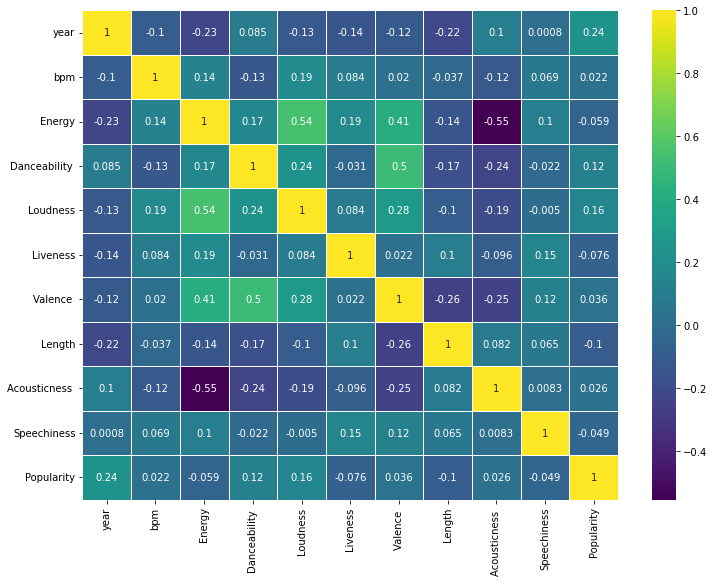

In [60]:
fig1 = plt.figure(figsize=(12, 9))
    sns.heatmap(df.corr(), annot=True,linewidths=.5, cmap='viridis')

## Conclusion

From the above heatmap we can figure out how a column is correlated to another columns. For example : 
- Energy of a song reduces drastically if it has high Acousticss in it.
- Over the years we can see their is a negative correlation in lenght of tracks i.e. Tracks size is getting shorter.
- As the dancebility of a song increases its valence also increases.
- Louder the song higher its energy.
- Higher the acoustics lower its bpm.
- As the songs length increases its valnce decreases. 
#### Charts made:
- Bar plot to visualize popularity of genre
- Pie chart of top 10 genre by market share
- Number of popular songs per year
- Top 20 artists of 2010 - 2019
- Length of tracks (box plot) to find outliers
- Top 5 artists hit songs per year
- Correlation heatmap
#### Data Cleaning
- Fetching null values and deuplicate values.
- Replaceing null values with mean, median,mode and removing duplicate rows.

#### Dataset source

- https://gist.github.com/rioto9858/ff72b72b3bf5754d29dd1ebf898fc893
- https://www.kaggle.com/datasets/leonardopena/top-spotify-songs-from-20102019-by-year